In [1]:
import pandas as pd
import csv
import numpy as np
from os import listdir
from os.path import isfile, join

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Path='/home/mgander/Atlantic/data/Viability/DTP'

In [3]:
# To get the data provide a blank separated list of e.g. NSC numbers to 
# https://dtp.cancer.gov/dtpstandard/subsets/dose.jsp

In [4]:
# Load all files

In [5]:
def read_all_files_from_directory(mypath):
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    frames=[]

    for file in onlyfiles:
        frames.append(pd.read_csv(f'{mypath}/{file}'))
    df=pd.concat(frames, ignore_index=True)
    return(df)

In [6]:
M=read_all_files_from_directory(Path+'/downloaded_data/Dose_data')

/tmp/ipykernel_16731/1462015254.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df=pd.concat(frames, ignore_index=True)


In [7]:
M

,NSC,CompoundUOM,PanelName,CellLineName,Endpoint,Concentration,EndpointValue,Dispersion,NumofExp
0,626398,log10(M),Central Nervous System,SF-268,GI%,-8.0,92.7,0.0,1
1,626398,log10(M),Central Nervous System,SF-268,GI%,-7.0,96.1,0.0,1
2,626398,log10(M),Central Nervous System,SF-268,GI%,-6.0,96.3,0.0,1
3,626398,log10(M),Central Nervous System,SF-268,GI%,-5.0,92.6,0.0,1
4,626398,log10(M),Central Nervous System,SF-268,GI%,-4.0,13.2,0.0,1
...,...,...,...,...,...,...,...,...,...
10169247,603077,log10(M),Small Cell Lung,DMS 273,GI%,-6.0,20.5,0.0,1
10169248,603077,log10(M),Small Cell Lung,DMS 273,GI%,-5.0,8.5,0.0,1
10169249,603077,log10(M),Small Cell Lung,DMS 273,GI%,-5.0,-32.0,0.0,1
10169250,603077,log10(M),Small Cell Lung,DMS 273,GI%,-4.0,-9.7,0.0,1


In [8]:
M.value_counts('CompoundUOM')

CompoundUOM
log10(M)        10105481
log10(ug/ml)       61200
log10(V)            2571
Name: count, dtype: int64

In [9]:
# This represents only a tiny fraction of drugs, so let's remove them
61200/10105481

0.006056119446466724

In [10]:
M=M[M['CompoundUOM']=='log10(M)'].copy()

In [11]:
M['CCL']=M['CellLineName']
M['Dose']=10**(M['Concentration']+6)
M['Duration']=48.0
M['Viability']=M['EndpointValue']
M['Source']='DTP'

In [12]:
df0=pd.read_excel(f'{Path}/downloaded_data/NSC_QUERY_LIST.xlsx', sheet_name='all').iloc[8:,:2]
df0.columns=['NSC', 'Compound']
nscs=list(df0['NSC'])
comps=list(df0['Compound'])
D_comp={nscs[i]:comps[i] for i in range(len(df0))}

M['Drug']=[D_comp[str(a)] for a in M['NSC']]

In [13]:
M=M[['CCL', 'Drug', 'Dose', 'Duration', 'Viability', 'Source']].copy()

In [14]:
M.to_pickle(f'{Path}/M.pkl')

In [3]:
M=pd.read_pickle(f'{Path}/M.pkl')

In [4]:
M['CCL']=M['CCL'].astype('category')
M['Drug']=M['Drug'].astype('category')
C=pd.crosstab(M['CCL'], M['Drug'])

In [5]:
C

Drug,"((((2-(Hydroxy(oxido)amino)-4,5-dimethoxybenzyl)oxy)carbonyl)anilino)acetic acid",((((4-Cyanophenyl)imino)(1-naphthylamino)methyl)amino)acetic acid,((((4-Cyanophenyl)imino)(2-naphthylamino)methyl)amino)acetic acid,(((1-(Benzylthio)cyclohexyl)thio)methyl)benzene,(((1-(Benzylthio)cyclopentyl)thio)methyl)benzene,"(((2-Chloro-2-(1,2,2-trichlorovinyl)cyclopropyl)methoxy)methyl)benzene","(((3,3-Bis(benzylthio)propyl)thio)methyl)benzene",(((4-((4-Fluorobenzoyl)amino)phenyl)sulfonyl)amino)acetic acid,(((4-((4-Methoxybenzoyl)amino)phenyl)sulfonyl)amino)acetic acid,(((4-((Iodoacetyl)amino)phenyl)sulfonyl)amino)acetic acid,...,z-endoxifen hydrochloride,zanubrutinib,zebularine,zedelan,zimelidine hydrochloride,"zinc, bis(5-sulfo-8-quinolinolato)-",zygosporin a,{3-[(4-Benzyloxycarbonylamino-butyl)-tert-butoxycarbonyl-amino]-propyl}-carbamic acid benzyl ester,{5-[2-Amino-6-(2-furyl)pyrimidin-4-yl]-2-furyl}methanol,{Allylcarbamoylmethyl-[2-(bis-carboxymethyl-amino)-cyclohexyl]-amino}-acetic acid
CCL,,,,,,,,,,,,,,,,,,,,,
786-0,5,5,5,5,0,5,5,5,5,5,...,10,5,15,5,5,10,40,5,5,5
A-172/H.Fine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A-204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A-C/EBP 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A-CREB 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VDSO/P,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WI-38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
XF 498,0,0,0,0,0,5,0,5,5,5,...,0,0,10,0,0,0,110,0,5,0


In [14]:
M[(M['CCL']=='XF 498')&(M['Drug']=='zebularine')]

,CCL,Drug,Dose,Duration,Viability,Source
6687652,XF 498,zebularine,0.01,48.0,98.2,DTP
6687653,XF 498,zebularine,0.01,48.0,94.4,DTP
6687654,XF 498,zebularine,0.10,48.0,92.8,DTP
6687655,XF 498,zebularine,0.10,48.0,93.8,DTP
6687656,XF 498,zebularine,1.00,48.0,96.1,DTP
6687657,XF 498,zebularine,1.00,48.0,92.7,DTP
6687658,XF 498,zebularine,10.00,48.0,96.5,DTP
6687659,XF 498,zebularine,10.00,48.0,90.7,DTP
6687660,XF 498,zebularine,100.00,48.0,66.8,DTP
6687661,XF 498,zebularine,100.00,48.0,73.2,DTP


<Axes: ylabel='Count'>

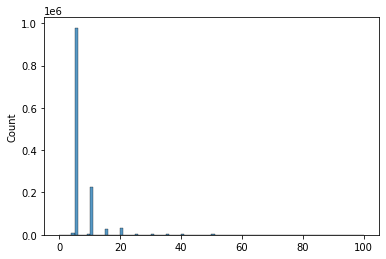

In [9]:
sns.histplot(C.values[C.values>0], bins=np.linspace(0,100,101))

In [38]:
(C>0).sum().sum()

1311997

In [12]:
M

,CCL,Drug,Dose,Duration,Viability,Source
0,SF-268,"1,4-Naphthalenedione, 2,2'-(1H-indole-2,3-diyl...",0.01,48.0,92.7,DTP
1,SF-268,"1,4-Naphthalenedione, 2,2'-(1H-indole-2,3-diyl...",0.10,48.0,96.1,DTP
2,SF-268,"1,4-Naphthalenedione, 2,2'-(1H-indole-2,3-diyl...",1.00,48.0,96.3,DTP
3,SF-268,"1,4-Naphthalenedione, 2,2'-(1H-indole-2,3-diyl...",10.00,48.0,92.6,DTP
4,SF-268,"1,4-Naphthalenedione, 2,2'-(1H-indole-2,3-diyl...",100.00,48.0,13.2,DTP
...,...,...,...,...,...,...
10169247,DMS 273,9-Acetamido-10-hydroxy-20-(S)-camptothecin,1.00,48.0,20.5,DTP
10169248,DMS 273,9-Acetamido-10-hydroxy-20-(S)-camptothecin,10.00,48.0,8.5,DTP
10169249,DMS 273,9-Acetamido-10-hydroxy-20-(S)-camptothecin,10.00,48.0,-32.0,DTP
10169250,DMS 273,9-Acetamido-10-hydroxy-20-(S)-camptothecin,100.00,48.0,-9.7,DTP


In [ ]:
1311997

In [13]:
10105481/1311997

7.702365935287962

In [45]:
656105/480/1148

1.1906667392566783

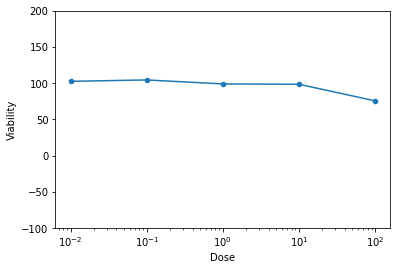

In [37]:
for i in range(100):
    cs=C.sample().T.sample(1)
    if cs.values>3:
        dr=list(cs.index)[0]
        ccl=list(cs.columns)[0]
        Ms=M[(M['CCL']==ccl)&(M['Drug']==dr)].copy()
        sns.lineplot(data=Ms, x='Dose', y='Viability')
        sns.scatterplot(data=Ms, x='Dose', y='Viability')
        break
plt.ylim(-100,200)
plt.xscale('log')

In [71]:
# Looks good

In [72]:
M

,CCL,Drug,Dose,Duration,Viability,Source
0,SF-268,"1,4-Naphthalenedione, 2,2'-(1H-indole-2,3-diyl...",0.01,48.0,92.7,DTP
1,SF-268,"1,4-Naphthalenedione, 2,2'-(1H-indole-2,3-diyl...",0.10,48.0,96.1,DTP
2,SF-268,"1,4-Naphthalenedione, 2,2'-(1H-indole-2,3-diyl...",1.00,48.0,96.3,DTP
3,SF-268,"1,4-Naphthalenedione, 2,2'-(1H-indole-2,3-diyl...",10.00,48.0,92.6,DTP
4,SF-268,"1,4-Naphthalenedione, 2,2'-(1H-indole-2,3-diyl...",100.00,48.0,13.2,DTP
...,...,...,...,...,...,...
10169247,DMS 273,9-Acetamido-10-hydroxy-20-(S)-camptothecin,1.00,48.0,20.5,DTP
10169248,DMS 273,9-Acetamido-10-hydroxy-20-(S)-camptothecin,10.00,48.0,8.5,DTP
10169249,DMS 273,9-Acetamido-10-hydroxy-20-(S)-camptothecin,10.00,48.0,-32.0,DTP
10169250,DMS 273,9-Acetamido-10-hydroxy-20-(S)-camptothecin,100.00,48.0,-9.7,DTP


### Optional: Check that we got them all

In [82]:
df0=pd.read_excel(f'{Path}/downloaded_data/NSC_QUERY_LIST.xlsx', sheet_name='all').iloc[8:,:2]
df0.columns=['NSC', 'Compound']
df0['NSC']=df0['NSC'].astype(int)
nscs=list(df0['NSC'])

In [83]:
df=pd.read_csv(f'{Path}/Dict/PubChem_translation.txt', sep='\t', header=None)
compounds_kept=sorted(set(df[~np.isnan(df[1])][0]))
nscs_kept=sorted(df0[df0['Compound'].isin(compounds_kept)]['NSC'])

In [84]:
already_there=sorted(set(M['NSC']))
# Get the missing ones:
for nsc in nscs_kept:
    if not nsc in already_there:
        print(nsc)

4962
33423
35027
35563
36408
36755
41880
45565
47700
50683
51534
99310
140865
379441
409073
659136
662779
754355
755384
756644
778909
797172
805149
805500
805596
805746
818001
822744
823658
823659
823806
823807
824183
824184
824722
824723
825088
825089
825151
825217
825254
825255
825282
825286
825287
825331
825332
825519
825520
825521
825522
825523
825713
825721
825775
825827
825956
826039
826040
826119
826275
826942
827275
827675
827676
827802
827886
828250
828251
828252
828316
828317
828318
828319
828583
828584
828717
828852
828853
828939
829066
829497
829498
830173
830201
830202
830368
830911
830912
831147
831270
831271
831453
831868
832046
832261
832262
832263
832522
832523
832772
832937
833292
833390
833745
833746
833899
833900
833901
833973
834160
834161
834196
834197
834374
834375
835418
835419
835563
835588
835589
835773
835775
835776
835817
836049
836050
836407
836439
836440
836824
836941
836942
837081
837082
837396
837397
837398
837892
837893
838377
838762
838763
839053
83910

In [ ]:
# I checked those, they do not have data